## Data Understanding

In [1]:
import pandas as pd

df = pd.read_csv('Customer-Churn-Records.csv')

In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [24]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Column Explanations - from Kaggle:
- RowNumber—corresponds to the record (row) number and has no effect on the output.
- CustomerId—contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography—a customer’s location can affect their decision to leave the bank.
- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts—refers to the number of products that a customer has purchased through the bank.
- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember—active customers are less likely to leave the bank.
- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited—whether or not the customer left the bank.
- Complain—customer has complaint or not.
- Satisfaction Score—Score provided by the customer for their complaint resolution.
- Card Type—type of card hold by the customer.
- Points Earned—the points earned by the customer for using credit card.

#### Target Identified:

In [4]:
df['Exited'].value_counts() # Likely going to be the target. 1 appears to represent if a customer left (churned)
## Appears to be slighly imbalanced, but not terribly so. Roughly 80/20 stay/leave

0    7962
1    2038
Name: Exited, dtype: int64

#### Columns Dropped:

In [5]:
# List of columns to be dropped: 
## RowNumber - acting as an index, ultimately is redundant and will be dropped.
## Surname - does not contain unique customer values like the CustomerId column, therefore is unnecessary
df = df.drop(['Surname', 'RowNumber'], axis=1)

In [6]:
df.shape

(10000, 16)

#### Feature/Column Exploration:

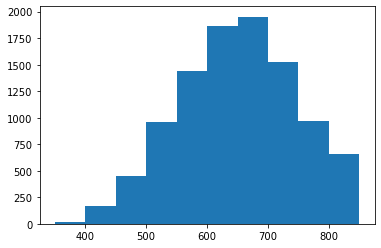

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['CreditScore']);

In [8]:
df['Geography'].value_counts()
# Will need to be processed - can be made into a binary variable columns via OneHotEncoder
# France appears to have the greatest number of Customers represented, at almost double both of the other countries

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()
# Will need to be processed - can be made into a binary variable column via OneHotEncoder

Male      5457
Female    4543
Name: Gender, dtype: int64

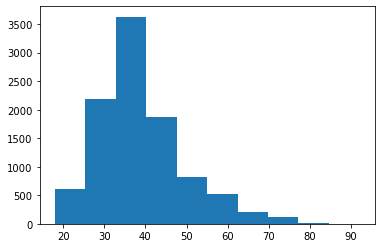

In [10]:
plt.hist(df['Age']);

In [23]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

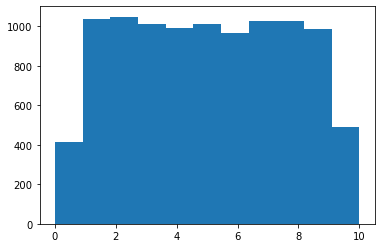

In [11]:
plt.hist(df['Tenure'], bins=11);
# With the Tenure values from 1-9 being virtually equal, this is likely NOT a good feature to measure churn.

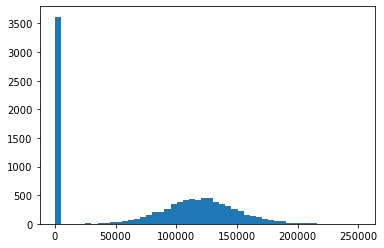

In [12]:
plt.hist(df['Balance'], bins=50);
# A LOT of zeros, this feature may skew our data??

In [13]:
df['NumOfProducts'].value_counts()
# May need to split this value into 4 separate columns! (OneHotEncode?)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [14]:
df['HasCrCard'].value_counts()
# Binary values - will not need to preprocess this any further. 1 represents a customer with a CC.

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [15]:
df['IsActiveMember'].value_counts()
# Binary values - no preprocessing needed. 1 rep's a subjective figure that a customer 'IS active'?
## Not sure what defines active vs inactive, and there doesn't appear to be add'l details provided.

1    5151
0    4849
Name: IsActiveMember, dtype: int64

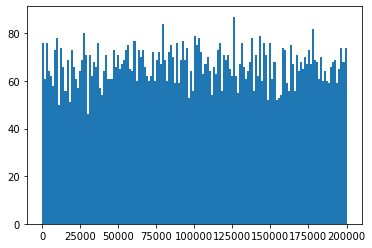

In [16]:
plt.hist(df['EstimatedSalary'], bins=150);
# It appears that this column's values are widely distributed and there is variety of salaries represented (somewhat evenly)

In [17]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [18]:
df['Complain'].value_counts()
# Binary, It appears that most (80%) of custmers have not filed complaints - this may be a key value...

0    7956
1    2044
Name: Complain, dtype: int64

In [19]:
df['Satisfaction Score'].value_counts()
# The values in this column appear to be ordinal, with a 5 as the highest satisfaction rating, 1 as the lowest
# Each of the 5 satisfaction ratings appears to have recieved virtually the same number of scores, with the exception of 1 (which is still very close)

3    2042
2    2014
4    2008
5    2004
1    1932
Name: Satisfaction Score, dtype: int64

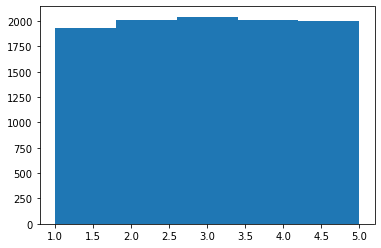

In [20]:
plt.hist(df['Satisfaction Score'], bins=5);

In [21]:
df['Card Type'].value_counts()
# Will need pre-processing, could OneHotEncode out this column
## Appears that each of the card types has around 1/4 of all of the records (~2500 each)

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

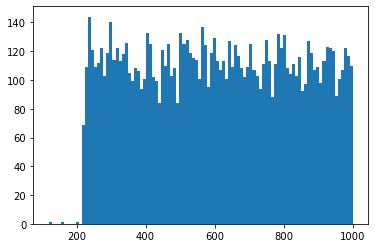

In [22]:
plt.hist(df['Point Earned'], bins=100);